In [91]:
import numpy as np
import pandas as pd

In [92]:
df = pd.read_csv("train.csv", index_col=0)
df = df.drop_duplicates()
df = df.drop(columns={"Name","Cabin"})
print(df.columns)
df.tail(10)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
882,0,3,male,33.0,0,0,349257,7.8958,S
883,0,3,female,22.0,0,0,7552,10.5167,S
884,0,2,male,28.0,0,0,C.A./SOTON 34068,10.5000,S
885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S
886,0,3,female,39.0,0,5,382652,29.1250,Q
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
890,1,1,male,26.0,0,0,111369,30.0000,C


In [93]:
print(df.isnull().sum())
print(df.shape)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64
(891, 9)


In [94]:
df['Ticket'] = df['Ticket'].str.replace(r'\D', '')
df = df.replace(r'^\s*$', np.NaN, regex=True)
for k in list(df):
    df["Ticket"]=pd.to_numeric(df["Ticket"], errors='ignore')
df["Ticket"] = df["Ticket"].interpolate(method='linear')
print(df.isnull().sum())
df

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64


The default value of regex will change from True to False in a future version.


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,521171.0,7.2500,S
2,1,1,female,38.0,1,0,17599.0,71.2833,C
3,1,3,female,26.0,0,0,23101282.0,7.9250,S
4,1,1,female,35.0,1,0,113803.0,53.1000,S
5,0,3,male,35.0,0,0,373450.0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536.0,13.0000,S
888,1,1,female,19.0,0,0,112053.0,30.0000,S
889,0,3,female,NaN,1,2,6607.0,23.4500,S


In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,521171.0,7.2500,2
2,1,1,0,38.0,1,0,17599.0,71.2833,0
3,1,3,0,26.0,0,0,23101282.0,7.9250,2
4,1,1,0,35.0,1,0,113803.0,53.1000,2
5,0,3,1,35.0,0,0,373450.0,8.0500,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,211536.0,13.0000,2
888,1,1,0,19.0,0,0,112053.0,30.0000,2
889,0,3,0,NaN,1,2,6607.0,23.4500,2


In [96]:
HA = df['Ticket'].mean() + 2.5*df['Ticket'].std()
LA = df['Ticket'].mean() - 2.5*df['Ticket'].std()
print("Highest allowed", HA)
print("Lowest allowed", LA)
print(df[(df['Ticket'] > HA) | (df['Ticket'] < LA)])
df = df[(df['Ticket'] < HA) & (df['Ticket'] > LA)]

HA2 = df['Fare'].mean() + 2.5*df['Fare'].std()
LA2 = df['Fare'].mean() - 2.5*df['Fare'].std()
print("Highest allowed", HA2)
print("Lowest allowed", LA2)
print(df[(df['Fare'] > HA2) | (df['Fare'] < LA2)])
df = df[(df['Fare'] < HA2) & (df['Fare'] > LA2)]
df

Highest allowed 9317247.5200265
Lowest allowed -7806240.494212807
             Survived  Pclass  Sex   Age  SibSp  Parch      Ticket    Fare  \
PassengerId                                                                  
3                   1       3    0  26.0      0      0  23101282.0   7.925   
116                 0       3    1  21.0      0      0  23101294.0   7.925   
143                 1       3    0  24.0      1      0  23101279.0  15.850   
174                 0       3    1  21.0      0      0  23101280.0   7.925   
217                 1       3    0  27.0      0      0  23101283.0   7.925   
244                 0       3    1  22.0      0      0  23101275.0   7.125   
383                 0       3    1  32.0      0      0  23101293.0   7.925   
401                 1       3    1  39.0      0      0  23101289.0   7.925   
404                 0       3    1  28.0      1      0  23101279.0  15.850   
415                 1       3    1  44.0      0      0  23101269.0   7.925  

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,521171.0,7.2500,2
2,1,1,0,38.0,1,0,17599.0,71.2833,0
4,1,1,0,35.0,1,0,113803.0,53.1000,2
5,0,3,1,35.0,0,0,373450.0,8.0500,2
6,0,3,1,NaN,0,0,330877.0,8.4583,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,211536.0,13.0000,2
888,1,1,0,19.0,0,0,112053.0,30.0000,2
889,0,3,0,NaN,1,2,6607.0,23.4500,2


In [97]:
df.loc[(df["Embarked"] == 0) & (df["Sex"] == 0), "Em_Sex"] = 0  
df.loc[(df["Embarked"] == 1) & (df["Sex"] == 0), "Em_Sex"] = 1  
df.loc[(df["Embarked"] == 2) & (df["Sex"] == 0), "Em_Sex"] = 2  
df.loc[(df["Embarked"] == 0) & (df["Sex"] == 1), "Em_Sex"] = 3  
df.loc[(df["Embarked"] == 1) & (df["Sex"] == 1), "Em_Sex"] = 4  
df.loc[(df["Embarked"] == 2) & (df["Sex"] == 1), "Em_Sex"] = 5  
df.tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Em_Sex
PassengerId,,,,,,,,,,
872,1,1,0,47.0,1,1,11751.0,52.5542,2,2.0
873,0,1,1,33.0,0,0,695.0,5.0000,2,5.0
874,0,3,1,47.0,0,0,345765.0,9.0000,2,5.0
875,1,2,0,28.0,1,0,3381.0,24.0000,0,0.0
876,1,3,0,15.0,0,0,2667.0,7.2250,0,0.0
877,0,3,1,20.0,0,0,7534.0,9.8458,2,5.0
878,0,3,1,19.0,0,0,349212.0,7.8958,2,5.0
879,0,3,1,NaN,0,0,349217.0,7.8958,2,5.0
880,1,1,0,56.0,0,1,11767.0,83.1583,0,0.0


In [98]:
df.loc[(df["Pclass"] == 0) & (df["Sex"] == 0), "Pclass_Sex"] = 0  
df.loc[(df["Pclass"] == 1) & (df["Sex"] == 0), "Pclass_Sex"] = 1  
df.loc[(df["Pclass"] == 2) & (df["Sex"] == 0), "Pclass_Sex"] = 2
df.loc[(df["Pclass"] == 3) & (df["Sex"] == 0), "Pclass_Sex"] = 3  
df.loc[(df["Pclass"] == 0) & (df["Sex"] == 1), "Pclass_Sex"] = 4  
df.loc[(df["Pclass"] == 1) & (df["Sex"] == 1), "Pclass_Sex"] = 5  
df.loc[(df["Pclass"] == 2) & (df["Sex"] == 1), "Pclass_Sex"] = 6
df.loc[(df["Pclass"] == 3) & (df["Sex"] == 1), "Pclass_Sex"] = 7  

In [99]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn import svm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from catboost import CatBoostRegressor, Pool
# load dataset
# split into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i != 11]
X, y = data[:, ix], data[:, 10]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
#define modeling pipeline
## model = svm.SVC(kernel='rbf', degree =3, gamma = 0.01, C = 100, max_iter=-1, random_state = 262)
model = BaggingRegressor()
# fit on the dataset
imputer.fit(X)
# transform the dataset
df = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(df).flatten()))
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Missing: 177
Missing: 0
Mean Accuracy: 1.000 (0.001)


In [100]:
df = pd.DataFrame(df)
df.columns = ["Survived","Pclass","Sex","Age","SibSp","Parch","Ticket","Fare", "Embarked","Em_Sex","Pclass_Sex"]

In [101]:
print(df.isnull().sum())
df.tail(10)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Em_Sex        0
Pclass_Sex    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Em_Sex,Pclass_Sex
839,0.0,3.0,1.0,33.000000,0.0,0.0,349257.0,7.8958,2.0,5.0,7.0
840,0.0,3.0,0.0,22.000000,0.0,0.0,7552.0,10.5167,2.0,2.0,3.0
841,0.0,2.0,1.0,28.000000,0.0,0.0,34068.0,10.5000,2.0,5.0,6.0
842,0.0,3.0,1.0,25.000000,0.0,0.0,392076.0,7.0500,2.0,5.0,7.0
843,0.0,3.0,0.0,39.000000,0.0,5.0,382652.0,29.1250,1.0,1.0,3.0
844,0.0,2.0,1.0,27.000000,0.0,0.0,211536.0,13.0000,2.0,5.0,6.0
845,1.0,1.0,0.0,19.000000,0.0,0.0,112053.0,30.0000,2.0,2.0,1.0
846,0.0,3.0,0.0,23.416047,1.0,2.0,6607.0,23.4500,2.0,2.0,3.0
847,1.0,1.0,1.0,26.000000,0.0,0.0,111369.0,30.0000,0.0,3.0,5.0
848,0.0,3.0,1.0,32.000000,0.0,0.0,370376.0,7.7500,1.0,4.0,7.0


In [102]:
df["Family"] = df["SibSp"] + df["Parch"]
df.loc[df["Family"] < 1, "Family"] = 0
df.loc[df["Family"] == 1, "Family"] = 1
df.loc[(df["Family"] > 1) & (df["Family"] <= 3), "Family"] = 2
df.loc[df["Family"] > 3, "Family"] = 3

In [103]:
df["Alone"] = df["SibSp"] + df["Parch"]
df.loc[df["Alone"] < 1, "Alone"] = 0
df.loc[df["Alone"] >= 1, "Alone"] = 1

In [104]:
df.loc[df["Age"] <= 5, "Age"] = 0
df.loc[(df["Age"] > 5) & (df["Age"] <= 10), "Age"] = 1
df.loc[(df["Age"] > 10) & (df["Age"] <= 25), "Age"] = 2
df.loc[(df["Age"] > 25) & (df["Age"] <= 30), "Age"] = 3
df.loc[(df["Age"] > 30) & (df["Age"] <= 40), "Age"] = 4
df.loc[df["Age"] > 40, "Age"] = 5

In [14]:
from sklearn.metrics import *
from genetic_selection import GeneticSelectionCV
mcc = make_scorer(matthews_corrcoef)
estimator = BaggingRegressor()
from sklearn.model_selection import *
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 2, n_splits = 10)
for i in range(2,11):
  
  selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  selector = selector.fit(df.drop(columns="Survived"), y)
  genfeats = df.drop(columns="Survived").columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats:  ", genfeats)

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

KeyboardInterrupt: 

In [106]:
#df["Survived"] = df["Survived"].astype(int)
print(df.dtypes)
X = df[["Age","SibSp","Ticket","Fare","Pclass_Sex","Family","Alone"]]
X

Survived      float64
Pclass        float64
Sex           float64
Age           float64
SibSp         float64
Parch         float64
Ticket        float64
Fare          float64
Embarked      float64
Em_Sex        float64
Pclass_Sex    float64
Family        float64
Alone         float64
dtype: object


,Age,SibSp,Ticket,Fare,Pclass_Sex,Family,Alone
0,2.0,1.0,521171.0,7.2500,7.0,1.0,1.0
1,4.0,1.0,17599.0,71.2833,1.0,1.0,1.0
2,4.0,1.0,113803.0,53.1000,1.0,1.0,1.0
3,4.0,0.0,373450.0,8.0500,7.0,0.0,0.0
4,3.0,0.0,330877.0,8.4583,7.0,0.0,0.0
...,...,...,...,...,...,...,...
844,3.0,0.0,211536.0,13.0000,6.0,0.0,0.0
845,2.0,0.0,112053.0,30.0000,1.0,0.0,0.0
846,2.0,1.0,6607.0,23.4500,3.0,2.0,1.0
847,3.0,0.0,111369.0,30.0000,5.0,0.0,0.0


In [107]:
y = df[["Survived"]]
y

,Survived
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
844,0.0
845,1.0
846,0.0
847,1.0


In [108]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, stratify=df["Sex"],
                                                    random_state=262)
mmsc = MinMaxScaler(feature_range=(0, 1))
stdscl = StandardScaler()
quantile_transformer = preprocessing.QuantileTransformer(random_state=262)
X_train = stdscl.fit_transform(X_train)
X_test = stdscl.transform(X_test)
X_train

array([[-0.7055853 , -0.46231695, -0.47226929, ..., -0.89297496,
        -0.70226867, -0.8005523 ],
       [ 0.7573036 ,  0.38006424, -0.42703695, ...,  0.48834568,
         1.3276466 ,  1.24913763],
       [-0.7055853 , -0.46231695, -0.48142602, ...,  0.9487859 ,
        -0.70226867, -0.8005523 ],
       ...,
       [-0.7055853 ,  1.22244542, -0.45867063, ...,  0.48834568,
         1.3276466 ,  1.24913763],
       [-0.7055853 ,  0.38006424, -0.45332658, ..., -1.81385539,
         0.31268897,  1.24913763],
       [ 0.02585915, -0.46231695,  0.16196548, ...,  0.9487859 ,
        -0.70226867, -0.8005523 ]])

In [109]:
##### from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score
import sklearn.metrics as metrics
cv = KFold(n_splits=20, random_state=1, shuffle=True)
# create model
#A = {0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,10,15,20,100}
#A = {0.1,0.2,0.4,0.65,0.68,0.69,0.7,0.71,0.72,0.73,0.75,0.8,0.85,0.9}
#A = {0.380,0.381,0.382,0.385,0.39,0.4,0.41,0.42}
xgb = XGBClassifier(use_label_encoder=False, base_score=0.25, booster='gbtree', eta=0.381, max_depth=5, min_child_weight=6,
                                max_delta_step=0.7, subsample=0.7, colsample_bytree=1, colsample_bylevel=0.7, colsample_bynode=1, 
                                reg_lambda=0, reg_alpha=1, tree_method="exact", sketch_eps=0.1, scale_pos_weight=1.6, 
                                objective="binary:logitraw", gamma=0.8, n_estimators=27, rate_drop=0.1, skip_drop=0.1,
                                random_state = 262, n_jobs=-1)
model = xgb
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy of: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of: 0.857 (0.064)


In [110]:
xgb.fit(X_train, y_train)
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_xgb_train, average='macro'),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_xgb_test, average='macro'),3))
f1_train = f1_score(y_train, y_pred_xgb_train, average='macro')
f1_test = f1_score(y_test, y_pred_xgb_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_xgb_train)
Accuracy_test = accuracy_score(y_test, y_pred_xgb_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

[17:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "rate_drop", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train precision= 0.905
test precision= 0.8
train f1 score= 0.885
test f1 score= 0.795
train accuracy score= 0.896
test accuracy score= 0.812


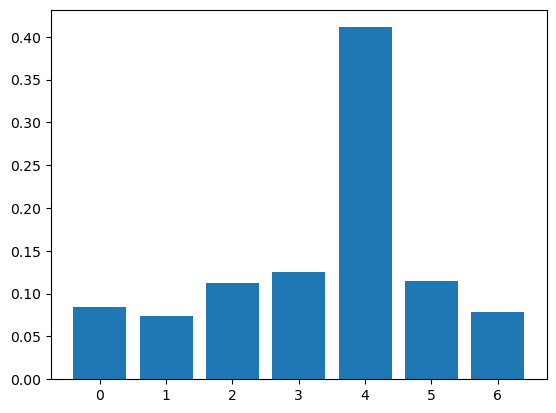

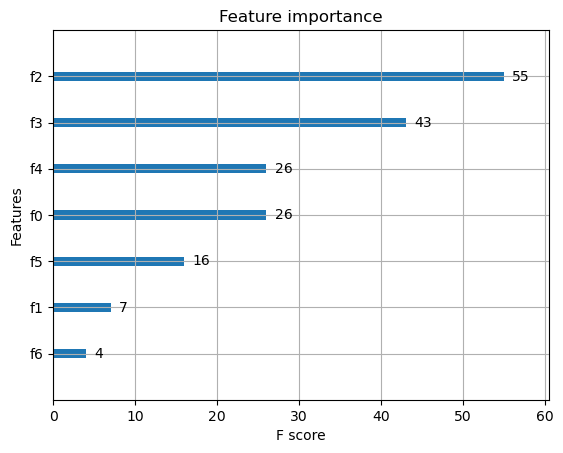

In [111]:
## print(xgb.feature_importances_)
import matplotlib.pyplot as mp
mp.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
mp.show()
# plot feature importance
from xgboost import plot_importance
plot_importance(xgb)
mp.show()

In [112]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score
import sklearn.metrics as metrics
from catboost import CatBoostClassifier, Pool
cv = KFold(n_splits=20, random_state=262, shuffle=True)
# create model
#for i in range(500,4000,500):
catb = CatBoostClassifier() #depth=16
model = catb
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.862 (0.059)


In [113]:
catb.fit(X_train, y_train)
y_pred_catb_train = catb.predict(X_train)
y_pred_catb_test = catb.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_catb_train, average='macro'),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_catb_test, average='macro'),3))
f1_train = f1_score(y_train, y_pred_catb_train, average='macro')
f1_test = f1_score(y_test, y_pred_catb_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_catb_train)
Accuracy_test = accuracy_score(y_test, y_pred_catb_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

Learning rate set to 0.008248
0:	learn: 0.6871465	total: 1.84ms	remaining: 1.84s
1:	learn: 0.6829635	total: 3.01ms	remaining: 1.5s
2:	learn: 0.6774177	total: 4.64ms	remaining: 1.54s
3:	learn: 0.6725409	total: 6.04ms	remaining: 1.5s
4:	learn: 0.6672309	total: 7.41ms	remaining: 1.47s
5:	learn: 0.6627562	total: 9.16ms	remaining: 1.52s
6:	learn: 0.6579733	total: 11.4ms	remaining: 1.62s
7:	learn: 0.6535071	total: 12.8ms	remaining: 1.59s
8:	learn: 0.6486392	total: 14.2ms	remaining: 1.57s
9:	learn: 0.6434998	total: 16ms	remaining: 1.59s
10:	learn: 0.6384441	total: 17.6ms	remaining: 1.58s
11:	learn: 0.6341802	total: 19.2ms	remaining: 1.58s
12:	learn: 0.6297255	total: 21ms	remaining: 1.59s
13:	learn: 0.6253767	total: 22.6ms	remaining: 1.59s
14:	learn: 0.6207159	total: 24.3ms	remaining: 1.59s
15:	learn: 0.6161807	total: 26.3ms	remaining: 1.61s
16:	learn: 0.6129970	total: 27ms	remaining: 1.56s
17:	learn: 0.6094119	total: 27.9ms	remaining: 1.52s
18:	learn: 0.6047460	total: 29.3ms	remaining: 1.51s


228:	learn: 0.3522133	total: 346ms	remaining: 1.16s
229:	learn: 0.3519850	total: 347ms	remaining: 1.16s
230:	learn: 0.3516211	total: 349ms	remaining: 1.16s
231:	learn: 0.3515177	total: 350ms	remaining: 1.16s
232:	learn: 0.3511348	total: 351ms	remaining: 1.16s
233:	learn: 0.3506030	total: 353ms	remaining: 1.16s
234:	learn: 0.3498125	total: 355ms	remaining: 1.15s
235:	learn: 0.3495629	total: 356ms	remaining: 1.15s
236:	learn: 0.3492241	total: 357ms	remaining: 1.15s
237:	learn: 0.3489128	total: 359ms	remaining: 1.15s
238:	learn: 0.3483965	total: 360ms	remaining: 1.15s
239:	learn: 0.3477435	total: 362ms	remaining: 1.15s
240:	learn: 0.3472320	total: 363ms	remaining: 1.14s
241:	learn: 0.3466172	total: 365ms	remaining: 1.14s
242:	learn: 0.3463245	total: 366ms	remaining: 1.14s
243:	learn: 0.3461322	total: 367ms	remaining: 1.14s
244:	learn: 0.3458674	total: 369ms	remaining: 1.14s
245:	learn: 0.3454650	total: 370ms	remaining: 1.13s
246:	learn: 0.3450718	total: 372ms	remaining: 1.13s
247:	learn: 

488:	learn: 0.2896936	total: 699ms	remaining: 730ms
489:	learn: 0.2895863	total: 701ms	remaining: 729ms
490:	learn: 0.2894823	total: 702ms	remaining: 728ms
491:	learn: 0.2892993	total: 704ms	remaining: 726ms
492:	learn: 0.2890380	total: 705ms	remaining: 725ms
493:	learn: 0.2887983	total: 706ms	remaining: 724ms
494:	learn: 0.2887460	total: 708ms	remaining: 722ms
495:	learn: 0.2884553	total: 709ms	remaining: 721ms
496:	learn: 0.2883686	total: 711ms	remaining: 719ms
497:	learn: 0.2881668	total: 712ms	remaining: 718ms
498:	learn: 0.2880520	total: 714ms	remaining: 716ms
499:	learn: 0.2878227	total: 715ms	remaining: 715ms
500:	learn: 0.2877667	total: 716ms	remaining: 713ms
501:	learn: 0.2877500	total: 717ms	remaining: 712ms
502:	learn: 0.2875400	total: 719ms	remaining: 710ms
503:	learn: 0.2873172	total: 721ms	remaining: 709ms
504:	learn: 0.2870671	total: 722ms	remaining: 708ms
505:	learn: 0.2867285	total: 724ms	remaining: 706ms
506:	learn: 0.2863838	total: 725ms	remaining: 705ms
507:	learn: 

754:	learn: 0.2497531	total: 1.05s	remaining: 341ms
755:	learn: 0.2495787	total: 1.05s	remaining: 340ms
756:	learn: 0.2494579	total: 1.05s	remaining: 339ms
757:	learn: 0.2493292	total: 1.06s	remaining: 337ms
758:	learn: 0.2492193	total: 1.06s	remaining: 336ms
759:	learn: 0.2491069	total: 1.06s	remaining: 335ms
760:	learn: 0.2490402	total: 1.06s	remaining: 333ms
761:	learn: 0.2489577	total: 1.06s	remaining: 332ms
762:	learn: 0.2489228	total: 1.06s	remaining: 330ms
763:	learn: 0.2488174	total: 1.06s	remaining: 329ms
764:	learn: 0.2486620	total: 1.07s	remaining: 328ms
765:	learn: 0.2485410	total: 1.07s	remaining: 326ms
766:	learn: 0.2484010	total: 1.07s	remaining: 325ms
767:	learn: 0.2482357	total: 1.07s	remaining: 323ms
768:	learn: 0.2481600	total: 1.07s	remaining: 322ms
769:	learn: 0.2480189	total: 1.07s	remaining: 321ms
770:	learn: 0.2478572	total: 1.07s	remaining: 319ms
771:	learn: 0.2477982	total: 1.08s	remaining: 318ms
772:	learn: 0.2477057	total: 1.08s	remaining: 317ms
773:	learn: 

train precision= 0.938
test precision= 0.83
train f1 score= 0.927
test f1 score= 0.825
train accuracy score= 0.933
test accuracy score= 0.839


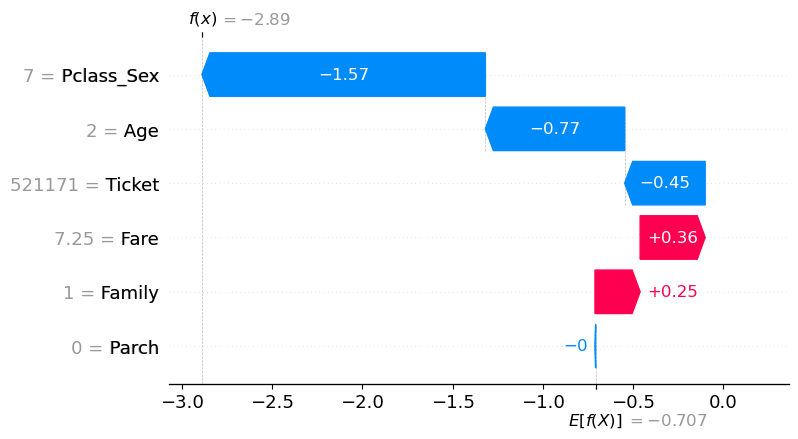

In [82]:
import shap
explainer = shap.Explainer(catb)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


In [83]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hist = HistGradientBoostingClassifier(n_iter_no_change=10, early_stopping=True, random_state=262)
cv = KFold(n_splits=5, random_state=262, shuffle=True)
# create model
model = hist
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.840 (0.027)


In [84]:
hist.fit(X_train, y_train)
y_pred_hist_train = hist.predict(X_train)
y_pred_hist_test = hist.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_hist_train, average='macro'),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_hist_test, average='macro'),3))
f1_train = f1_score(y_train, y_pred_hist_train, average='macro')
f1_test = f1_score(y_test, y_pred_hist_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_hist_train)
Accuracy_test = accuracy_score(y_test, y_pred_hist_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


train precision= 0.947
test precision= 0.806
train f1 score= 0.942
test f1 score= 0.807
train accuracy score= 0.946
test accuracy score= 0.82


In [85]:
from sklearn.ensemble import BaggingClassifier
cv = KFold(n_splits=20, random_state=262, shuffle=True)
#A = {0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1}
for i in range(5,6):
    bag = BaggingClassifier(n_estimators=10, max_samples=0.6, max_features=0.9, random_state=262)
    # create model
    model = bag
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.836 (0.057)


In [86]:
bag.fit(X_train, y_train)
y_pred_bag_train = bag.predict(X_train)
y_pred_bag_test = bag.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_bag_train, average='macro'),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_bag_test, average='macro'),3))
f1_train = f1_score(y_train, y_pred_bag_train, average='macro')
f1_test = f1_score(y_test, y_pred_bag_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_bag_train)
Accuracy_test = accuracy_score(y_test, y_pred_bag_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

train precision= 0.953
test precision= 0.816
train f1 score= 0.948
test f1 score= 0.813
train accuracy score= 0.951
test accuracy score= 0.827


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [112]:
import tensorflow as tf
import keras
tf.__version__

'2.6.0'

In [113]:
from keras.layers import Dropout
### Initializing the ANN
ann = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=40, activation='relu'))
ann.add(Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
### Compiling the ANN
ann.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
### Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 10, epochs = 300)

Epoch 1/300
60/60 [==============================] - 1s 1ms/step - loss: 0.6744 - accuracy: 0.6111
Epoch 2/300
60/60 [==============================] - 0s 879us/step - loss: 0.6221 - accuracy: 0.6397
Epoch 3/300
60/60 [==============================] - 0s 947us/step - loss: 0.6067 - accuracy: 0.6582
Epoch 4/300
60/60 [==============================] - 0s 660us/step - loss: 0.5816 - accuracy: 0.7222
Epoch 5/300
60/60 [==============================] - 0s 659us/step - loss: 0.5615 - accuracy: 0.7138
Epoch 6/300
60/60 [==============================] - 0s 710us/step - loss: 0.5514 - accuracy: 0.7306
Epoch 7/300
60/60 [==============================] - 0s 608us/step - loss: 0.5324 - accuracy: 0.7492
Epoch 8/300
60/60 [==============================] - 0s 778us/step - loss: 0.5368 - accuracy: 0.7492
Epoch 9/300
60/60 [==============================] - 0s 761us/step - loss: 0.5118 - accuracy: 0.7593
Epoch 10/300
60/60 [==============================] - 0s 812us/step - loss: 0.5361 - accuracy

60/60 [==============================] - 0s 677us/step - loss: 0.4380 - accuracy: 0.7946
Epoch 80/300
60/60 [==============================] - 0s 761us/step - loss: 0.4493 - accuracy: 0.7929
Epoch 81/300
60/60 [==============================] - 0s 744us/step - loss: 0.4662 - accuracy: 0.8013
Epoch 82/300
60/60 [==============================] - 0s 692us/step - loss: 0.4384 - accuracy: 0.8098
Epoch 83/300
60/60 [==============================] - 0s 794us/step - loss: 0.4556 - accuracy: 0.7946
Epoch 84/300
60/60 [==============================] - 0s 845us/step - loss: 0.4455 - accuracy: 0.7963
Epoch 85/300
60/60 [==============================] - 0s 778us/step - loss: 0.4604 - accuracy: 0.7912
Epoch 86/300
60/60 [==============================] - 0s 743us/step - loss: 0.4580 - accuracy: 0.7963
Epoch 87/300
60/60 [==============================] - 0s 659us/step - loss: 0.4484 - accuracy: 0.8148
Epoch 88/300
60/60 [==============================] - 0s 744us/step - loss: 0.4517 - accuracy: 

60/60 [==============================] - 0s 846us/step - loss: 0.4393 - accuracy: 0.8215
Epoch 158/300
60/60 [==============================] - 0s 811us/step - loss: 0.4244 - accuracy: 0.8131
Epoch 159/300
60/60 [==============================] - 0s 727us/step - loss: 0.4173 - accuracy: 0.8266
Epoch 160/300
60/60 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.70 - 0s 727us/step - loss: 0.4135 - accuracy: 0.8081
Epoch 161/300
60/60 [==============================] - 0s 727us/step - loss: 0.4179 - accuracy: 0.8182
Epoch 162/300
60/60 [==============================] - 0s 710us/step - loss: 0.4289 - accuracy: 0.8215
Epoch 163/300
60/60 [==============================] - 0s 744us/step - loss: 0.4384 - accuracy: 0.8182
Epoch 164/300
60/60 [==============================] - 0s 744us/step - loss: 0.4291 - accuracy: 0.8165
Epoch 165/300
60/60 [==============================] - 0s 762us/step - loss: 0.4203 - accuracy: 0.8114
Epoch 166/300
60/60 [========================

60/60 [==============================] - 0s 710us/step - loss: 0.4330 - accuracy: 0.8098
Epoch 236/300
60/60 [==============================] - 0s 727us/step - loss: 0.4121 - accuracy: 0.8249
Epoch 237/300
60/60 [==============================] - 0s 863us/step - loss: 0.4201 - accuracy: 0.8266
Epoch 238/300
60/60 [==============================] - 0s 896us/step - loss: 0.4313 - accuracy: 0.8098
Epoch 239/300
60/60 [==============================] - 0s 947us/step - loss: 0.4248 - accuracy: 0.8148
Epoch 240/300
60/60 [==============================] - 0s 795us/step - loss: 0.4025 - accuracy: 0.8266
Epoch 241/300
60/60 [==============================] - 0s 744us/step - loss: 0.4131 - accuracy: 0.8367
Epoch 242/300
60/60 [==============================] - 0s 693us/step - loss: 0.4321 - accuracy: 0.8131
Epoch 243/300
60/60 [==============================] - ETA: 0s - loss: 0.3745 - accuracy: 0.90 - 0s 693us/step - loss: 0.4259 - accuracy: 0.8047
Epoch 244/300
60/60 [========================

In [115]:
from sklearn.metrics import average_precision_score
y_pred_train = np.round(ann.predict(X_train),0)
y_pred_test = np.round(ann.predict(X_test),0)
precision_test = average_precision_score(y_test, y_pred_test)
precision_train = average_precision_score(y_train, y_pred_train)
print(precision_train)
print(precision_test)
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(f1_train)
print(f1_test)
Accuracy_train = accuracy_score(y_train, y_pred_train)
Accuracy_test = accuracy_score(y_test, y_pred_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

0.6915612599206349
0.6677096370463078
0.815040852929454
0.8063258451619436
train accuracy score= 0.832
test accuracy score= 0.824


In [116]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from keras.layers import Dropout
def build_classifier():
    ### Initializing the ANN
    ann_p = tf.keras.models.Sequential()
    ### Adding the input layer and the hidden layers
    ann_p.add(tf.keras.layers.Dense(units=20, activation='relu'))
    ann_p.add(Dropout(0.2))
    ann_p.add(tf.keras.layers.Dense(units=20, activation='relu'))
    ann_p.add(Dropout(0.6))
    ann_p.add(tf.keras.layers.Dense(units=20, activation='elu'))
    ann_p.add(Dropout(0.3))
    ann_p.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ### Compiling the ANN
    ann_p.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann_p
ann_p = KerasClassifier(build_fn = build_classifier, batch_size = 8, epochs = 300, 
                        validation_data=(X_test,y_test), verbose=2)

In [117]:
accuracies = cross_val_score(estimator=ann_p, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=1)
print(accuracies)
mean = accuracies.mean()
std = accuracies.std()
print([mean], [std])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.8s remaining:  1.5min


[0.81512606 0.78991598 0.8487395  0.84033614 0.81355929]
[0.8215353965759278] [0.020966721128898667]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.5s finished


In [28]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', degree =2, gamma = 0.3, C = 1200, max_iter=-1, random_state = 262) 

#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svm_train = clf.predict(X_train)
y_pred_svm_test = clf.predict(X_test)
print(np.round(metrics.precision_score(y_train, y_pred_svm_train),3))
print(np.round(metrics.precision_score(y_test, y_pred_svm_test),3))
Accuracy_train = accuracy_score(y_train, y_pred_svm_train)
Accuracy_test = accuracy_score(y_test, y_pred_svm_test)
f1_train = f1_score(y_train, y_pred_svm_train, average='macro')
f1_test = f1_score(y_test, y_pred_svm_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))


0.91
0.758
train f1 score= 0.906
test f1 score= 0.801
train accuracy score= 0.912
test accuracy score= 0.816


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a svm Classifier#
clfrf=RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=5,
    min_samples_split=11, min_samples_leaf=1, min_weight_fraction_leaf=0.05, max_features='auto', max_leaf_nodes=10,
    min_impurity_decrease=0.06, bootstrap=True, oob_score=False, n_jobs=-1,
    verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.02, max_samples=80, random_state = 262)

# Train the model using the training sets y_pred=clf.predict(X_test)
clfrf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred_rf_train = clfrf.predict(X_train)
y_pred_rf_test = clfrf.predict(X_test)
print(metrics.precision_score(y_train, y_pred_rf_train))
print(metrics.precision_score(y_test, y_pred_rf_test))
f1_train = f1_score(y_train, y_pred_rf_train, average='macro')
f1_test = f1_score(y_test, y_pred_rf_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_rf_train)
Accuracy_test = accuracy_score(y_test, y_pred_rf_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9159663865546218
0.9545454545454546
train f1 score= 0.744
test f1 score= 0.732
train accuracy score= 0.79
test accuracy score= 0.788


In [29]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm_train = lgbm.predict(X_train)
y_pred_lgbm_test = lgbm.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_lgbm_train),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_lgbm_test),3))
f1_train = f1_score(y_train, y_pred_lgbm_train, average='macro')
f1_test = f1_score(y_test, y_pred_lgbm_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_lgbm_train)
Accuracy_test = accuracy_score(y_test, y_pred_lgbm_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

train precision= 0.982
test precision= 0.714
train f1 score= 0.978
test f1 score= 0.783
train accuracy score= 0.98
test accuracy score= 0.796


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [48]:
dft = pd.read_csv("test.csv", index_col=0)
dft = dft.drop(columns={"Name","Cabin"})
dft['Ticket'] = dft['Ticket'].str.replace(r'\D', '')
dft = dft.replace(r'^\s*$', np.NaN, regex=True)
print(dft[["Ticket"]].values)

[['330911']
 ['363272']
 ['240276']
 ['315154']
 ['3101298']
 ['7538']
 ['330972']
 ['248738']
 ['2657']
 ['448871']
 ['349220']
 ['694']
 ['21228']
 ['24065']
 ['5734']
 ['2167']
 ['233734']
 ['2692']
 ['23101270']
 ['2696']
 ['17603']
 ['17368']
 ['17598']
 ['17597']
 ['17608']
 ['53337']
 ['113509']
 ['2698']
 ['113054']
 ['2662']
 ['3085']
 ['31029']
 ['2315']
 ['6607']
 ['13236']
 ['2682']
 ['342712']
 ['315087']
 ['345768']
 ['1601']
 ['349256']
 ['113778']
 ['3101263']
 ['237249']
 ['11753']
 ['23101291']
 ['17594']
 ['370374']
 ['11813']
 ['37671']
 ['13695']
 ['2168']
 ['29105']
 ['19950']
 ['32861']
 ['382652']
 ['349230']
 ['348122']
 ['386525']
 ['17608']
 ['349232']
 ['237216']
 ['347090']
 ['334914']
 ['17608']
 ['13534']
 ['330963']
 ['113796']
 ['2543']
 ['19950']
 ['382653']
 ['349211']
 ['3101297']
 ['17562']
 ['113503']
 ['113503']
 ['359306']
 ['11770']
 ['248744']
 ['368702']
 ['2678']
 ['17483']
 ['19924']
 ['349238']
 ['240261']
 ['2660']
 ['330844']
 ['431416']


The default value of regex will change from True to False in a future version.


In [49]:
for k in list(dft):
    dft["Ticket"]=pd.to_numeric(dft["Ticket"], errors='ignore')
dft["Ticket"] = dft["Ticket"].interpolate(method='linear')
dft.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [50]:
le = LabelEncoder()
dft['Sex'] = le.fit_transform(dft['Sex'])
dft['Embarked'] = le.fit_transform(dft['Embarked'])
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,330911,7.8292,1
893,3,0,47.0,1,0,363272,7.0000,2
894,2,1,62.0,0,0,240276,9.6875,1
895,3,1,27.0,0,0,315154,8.6625,2
896,3,0,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...
1305,3,1,NaN,0,0,53236,8.0500,2
1306,1,0,39.0,0,0,17758,108.9000,0
1307,3,1,38.5,0,0,3101262,7.2500,2


In [51]:
dft.loc[(dft["Pclass"] == 0) & (dft["Sex"] == 0), "Pclass_Sex"] = 0  
dft.loc[(dft["Pclass"] == 1) & (dft["Sex"] == 0), "Pclass_Sex"] = 1  
dft.loc[(dft["Pclass"] == 2) & (dft["Sex"] == 0), "Pclass_Sex"] = 2
dft.loc[(dft["Pclass"] == 3) & (dft["Sex"] == 0), "Pclass_Sex"] = 3  
dft.loc[(dft["Pclass"] == 0) & (dft["Sex"] == 1), "Pclass_Sex"] = 4  
dft.loc[(dft["Pclass"] == 1) & (dft["Sex"] == 1), "Pclass_Sex"] = 5  
dft.loc[(dft["Pclass"] == 2) & (dft["Sex"] == 1), "Pclass_Sex"] = 6
dft.loc[(dft["Pclass"] == 3) & (dft["Sex"] == 1), "Pclass_Sex"] = 7  

In [52]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
# load dataset
# split into input and output elements
data = dft.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 8]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
#define modeling pipeline
## model = svm.SVC(kernel='rbf', degree =3, gamma = 0.01, C = 100, max_iter=-1, random_state = 262)
model = BaggingRegressor()
# fit on the dataset
imputer.fit(X)
# transform the dataset
dft = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(dft).flatten()))
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Missing: 87
Missing: 0
Mean Accuracy: 1.000 (0.000)


In [53]:
dft = pd.DataFrame(dft)
dft.columns = ["Pclass","Sex","Age","SibSp","Parch","Ticket","Fare", "Embarked","Pclass_Sex"]
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_Sex
0,3.0,1.0,34.500000,0.0,0.0,330911.0,7.8292,1.0,7.0
1,3.0,0.0,47.000000,1.0,0.0,363272.0,7.0000,2.0,3.0
2,2.0,1.0,62.000000,0.0,0.0,240276.0,9.6875,1.0,6.0
3,3.0,1.0,27.000000,0.0,0.0,315154.0,8.6625,2.0,7.0
4,3.0,0.0,22.000000,1.0,1.0,3101298.0,12.2875,2.0,3.0
...,...,...,...,...,...,...,...,...,...
413,3.0,1.0,25.250671,0.0,0.0,53236.0,8.0500,2.0,7.0
414,1.0,0.0,39.000000,0.0,0.0,17758.0,108.9000,0.0,1.0
415,3.0,1.0,38.500000,0.0,0.0,3101262.0,7.2500,2.0,7.0
416,3.0,1.0,25.256597,0.0,0.0,359309.0,8.0500,2.0,7.0


In [54]:
dft.loc[dft["Age"] <= 5, "Age"] = 0
dft.loc[(dft["Age"] > 5) & (dft["Age"] <= 10), "Age"] = 1
dft.loc[(dft["Age"] > 10) & (dft["Age"] <= 25), "Age"] = 2
dft.loc[(dft["Age"] > 25) & (dft["Age"] <= 30), "Age"] = 3
dft.loc[(dft["Age"] > 30) & (dft["Age"] <= 40), "Age"] = 4
dft.loc[dft["Age"] > 40, "Age"] = 5
dft

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_Sex
0,3.0,1.0,4.0,0.0,0.0,330911.0,7.8292,1.0,7.0
1,3.0,0.0,5.0,1.0,0.0,363272.0,7.0000,2.0,3.0
2,2.0,1.0,5.0,0.0,0.0,240276.0,9.6875,1.0,6.0
3,3.0,1.0,3.0,0.0,0.0,315154.0,8.6625,2.0,7.0
4,3.0,0.0,2.0,1.0,1.0,3101298.0,12.2875,2.0,3.0
...,...,...,...,...,...,...,...,...,...
413,3.0,1.0,3.0,0.0,0.0,53236.0,8.0500,2.0,7.0
414,1.0,0.0,4.0,0.0,0.0,17758.0,108.9000,0.0,1.0
415,3.0,1.0,4.0,0.0,0.0,3101262.0,7.2500,2.0,7.0
416,3.0,1.0,3.0,0.0,0.0,359309.0,8.0500,2.0,7.0


In [55]:
dft["Family"] = dft["SibSp"] + dft["Parch"]
dft.loc[dft["Family"] < 1, "Family"] = 0
dft.loc[dft["Family"] == 1, "Family"] = 1
dft.loc[(dft["Family"] > 1) & (dft["Family"] <= 3), "Family"] = 2
dft.loc[dft["Family"] > 3, "Family"] = 3

In [56]:
dft = dft[["Age","Ticket","Fare","Pclass_Sex","Family"]]
dft = stdscl.transform(dft)
dft

array([[ 0.7573036 ,  0.12795398, -0.65517416,  0.9487859 , -0.70226867],
       [ 1.48874805,  0.18802308, -0.68374272, -0.89297496,  0.31268897],
       [ 1.48874805, -0.04028443, -0.59114985,  0.48834568, -0.70226867],
       ...,
       [ 0.7573036 ,  5.27033221, -0.67512943,  0.9487859 , -0.70226867],
       [ 0.02585915,  0.18066689, -0.6475669 ,  0.9487859 , -0.70226867],
       [-0.7055853 , -0.48133692, -0.15460073,  0.9487859 ,  1.3276466 ]])

In [57]:
y_pred_xgb = pd.DataFrame(np.round(xgb.predict(dft),0))
y_pred_xgb.to_csv("xgb_baggingregressor3.csv")